# Training Model without Lag features and rolling window

## Models[CatBoost-LightGBT-RandomForest-XGBoost]

In [8]:
cleaned = pd.read_csv('Data.csv')

In [11]:
# import libs
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt

In [13]:
# Prepare Features & Target
from sklearn.preprocessing import MinMaxScaler

targets = ['speed', 'travel_time']

all_features = [
  'hour_sin','hour_cos', 'minute_sin', 'minute_cos', 'day_sin', 'day_cos',
  'week_num_sin', 'week_num_cos', 'month_sin', 'month_cos', 'is_holiday',
  'is_non_business_day', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
  'snow', 'snowdepth', 'windspeed', 'winddir', 'cloudcover', 'visibility',
  'solarradiation', 'solarenergy', 'uvindex','crash_count',
  'total_injuries', 'total_fatalities', 'crash_severity','crash_occurred'
]

scaler = MinMaxScaler()

# Fit and transform the data
cleaned[['speed', 'travel_time']] = scaler.fit_transform(cleaned[['speed', 'travel_time']])

X = cleaned[all_features]
y = cleaned[targets]

# Split features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# buid Model
eval_set = Pool(X_test, y_test)

model = CatBoostRegressor(
    iterations= 400,
    learning_rate=0.1,
    depth=10,
    loss_function='MultiRMSE',
    eval_metric='MultiRMSE',
    verbose=0,
    random_seed=42
)

# Train model
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)



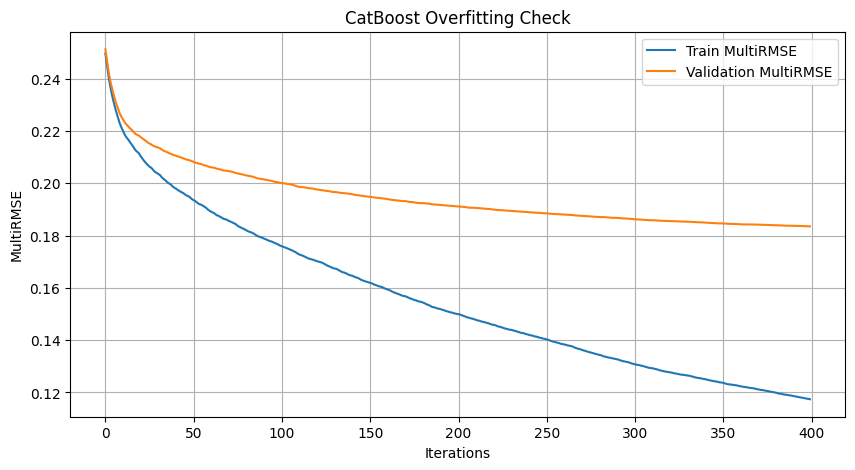

In [14]:
# check overfitting
evals_result = model.get_evals_result()
plt.figure(figsize=(10, 5))
plt.plot(evals_result['learn']['MultiRMSE'], label='Train MultiRMSE')
plt.plot(evals_result['validation']['MultiRMSE'], label='Validation MultiRMSE')
plt.xlabel('Iterations')
plt.ylabel('MultiRMSE')
plt.title('CatBoost Overfitting Check')
plt.legend()
plt.grid()
plt.show()

Speed Prediction Metrics:
  RMSE                : 0.1261
  MSE                 : 0.0159
  MAE                 : 0.0950
  Median Absolute Err: 0.0744
  R² Score            : 0.5593
  Response Time       : 0.0210 sec


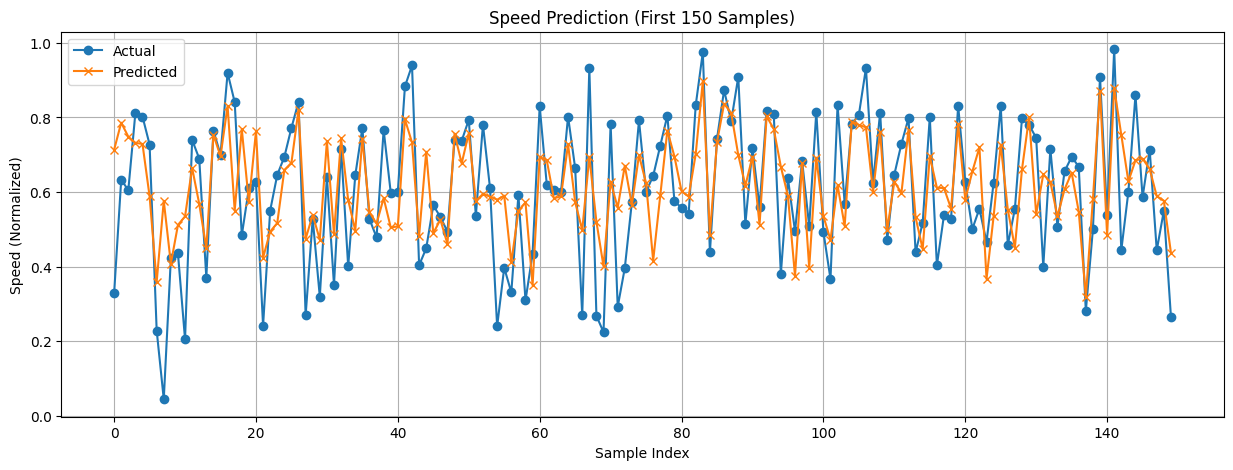

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error,
    r2_score, explained_variance_score
)

# Predict and measure response time
start_time = time.time()
preds = model.predict(X_test)
end_time = time.time()

response_time = end_time - start_time  # in seconds

# Extract predictions for 'speed'
preds_speed = preds[:, 0]  # assuming first column = speed
y_test_speed = y_test['speed'].values

# Compute metrics
rmse = np.sqrt(mean_squared_error(y_test_speed, preds_speed))
mse = mean_squared_error(y_test_speed, preds_speed)
mae = mean_absolute_error(y_test_speed, preds_speed)
medae = median_absolute_error(y_test_speed, preds_speed)
r2 = r2_score(y_test_speed, preds_speed)

# Store results in a list or dataframe
results = []
results.append((
    "Speed", rmse, mse, mae, medae, r2, response_time
))

# Display results
print(f"Speed Prediction Metrics:")
print(f"  RMSE                : {rmse:.4f}")
print(f"  MSE                 : {mse:.4f}")
print(f"  MAE                 : {mae:.4f}")
print(f"  Median Absolute Err: {medae:.4f}")
print(f"  R² Score            : {r2:.4f}")
print(f"  Response Time       : {response_time:.4f} sec")

# Visualization for the first 150 samples
plt.figure(figsize=(15, 5))
plt.plot(y_test_speed[:150], label='Actual', marker='o')
plt.plot(preds_speed[:150], label='Predicted', marker='x')
plt.title("Speed Prediction (First 150 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Speed (Normalized)")
plt.legend()
plt.grid(True)
plt.show()


Travel time Prediction Metrics:
  RMSE                : 0.1333
  MSE                 : 0.0178
  MAE                 : 0.0908
  Median Absolute Err: 0.0582
  R² Score            : 0.4063
  Response Time       : 0.0410 sec


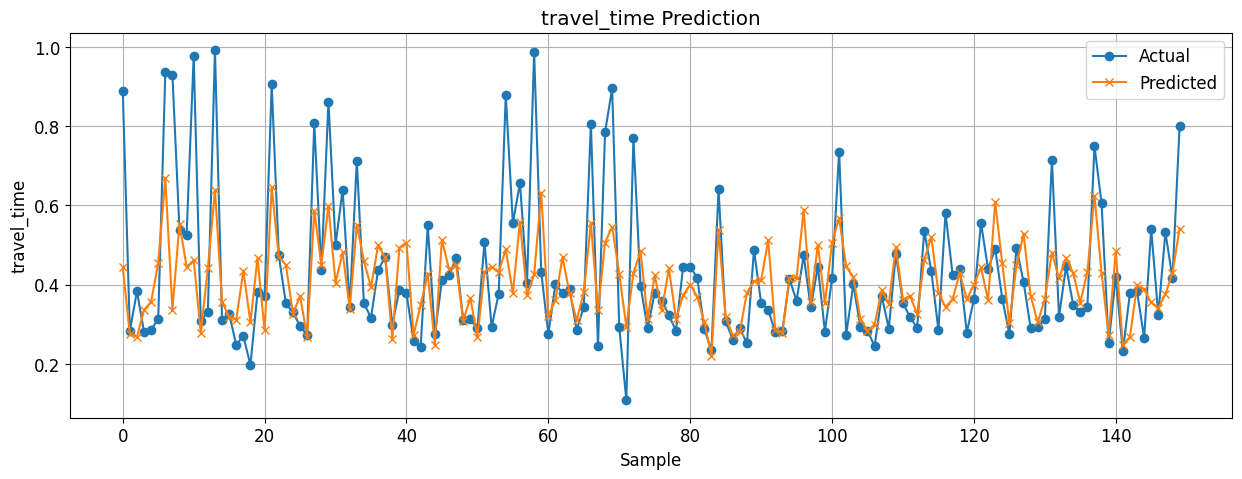

In [117]:
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error,
    r2_score, explained_variance_score
)

# Predict and measure response time
start_time = time.time()
preds = model.predict(X_test)
end_time = time.time()

response_time = end_time - start_time  # in seconds

# Extract predictions for 'speed'
preds_speed = preds[:, 1]  # assuming first column = speed
y_test_speed = y_test['travel_time'].values

# Calculate metrics for speed prediction
rmse = np.sqrt(mean_squared_error(y_test_speed, preds_speed))
r2 = r2_score(y_test_speed, preds_speed)
results = []
results.append((
    "travel_time", rmse, mse, mae, medae, r2, response_time
))
# Compute metrics
rmse = np.sqrt(mean_squared_error(y_test_speed, preds_speed))
mse = mean_squared_error(y_test_speed, preds_speed)
mae = mean_absolute_error(y_test_speed, preds_speed)
medae = median_absolute_error(y_test_speed, preds_speed)
r2 = r2_score(y_test_speed, preds_speed)
# Display results
print(f"Travel time Prediction Metrics:")
print(f"  RMSE                : {rmse:.4f}")
print(f"  MSE                 : {mse:.4f}")
print(f"  MAE                 : {mae:.4f}")
print(f"  Median Absolute Err: {medae:.4f}")
print(f"  R² Score            : {r2:.4f}")
print(f"  Response Time       : {response_time:.4f} sec")

# Visualization for the first 100 samples
plt.figure(figsize=(15, 5))
plt.plot(y_test_speed[:150], label='Actual', marker='o')
plt.plot(preds_speed[:150], label='Predicted', marker='x')
plt.title(f"travel_time Prediction")
plt.xlabel("Sample")
plt.ylabel("travel_time")
plt.legend()
plt.grid(True)
plt.show()

Feature Importance:
hour_cos: 11.8937276171
hour_sin: 11.6364126133
week_num_sin: 7.9836005948
week_num_cos: 6.7402653649
windspeed: 6.6921392796
winddir: 6.4226145500
cloudcover: 6.2174688756
day_sin: 5.7337132849
humidity: 5.1970487208
day_cos: 5.0166908745
dew: 4.5755030821


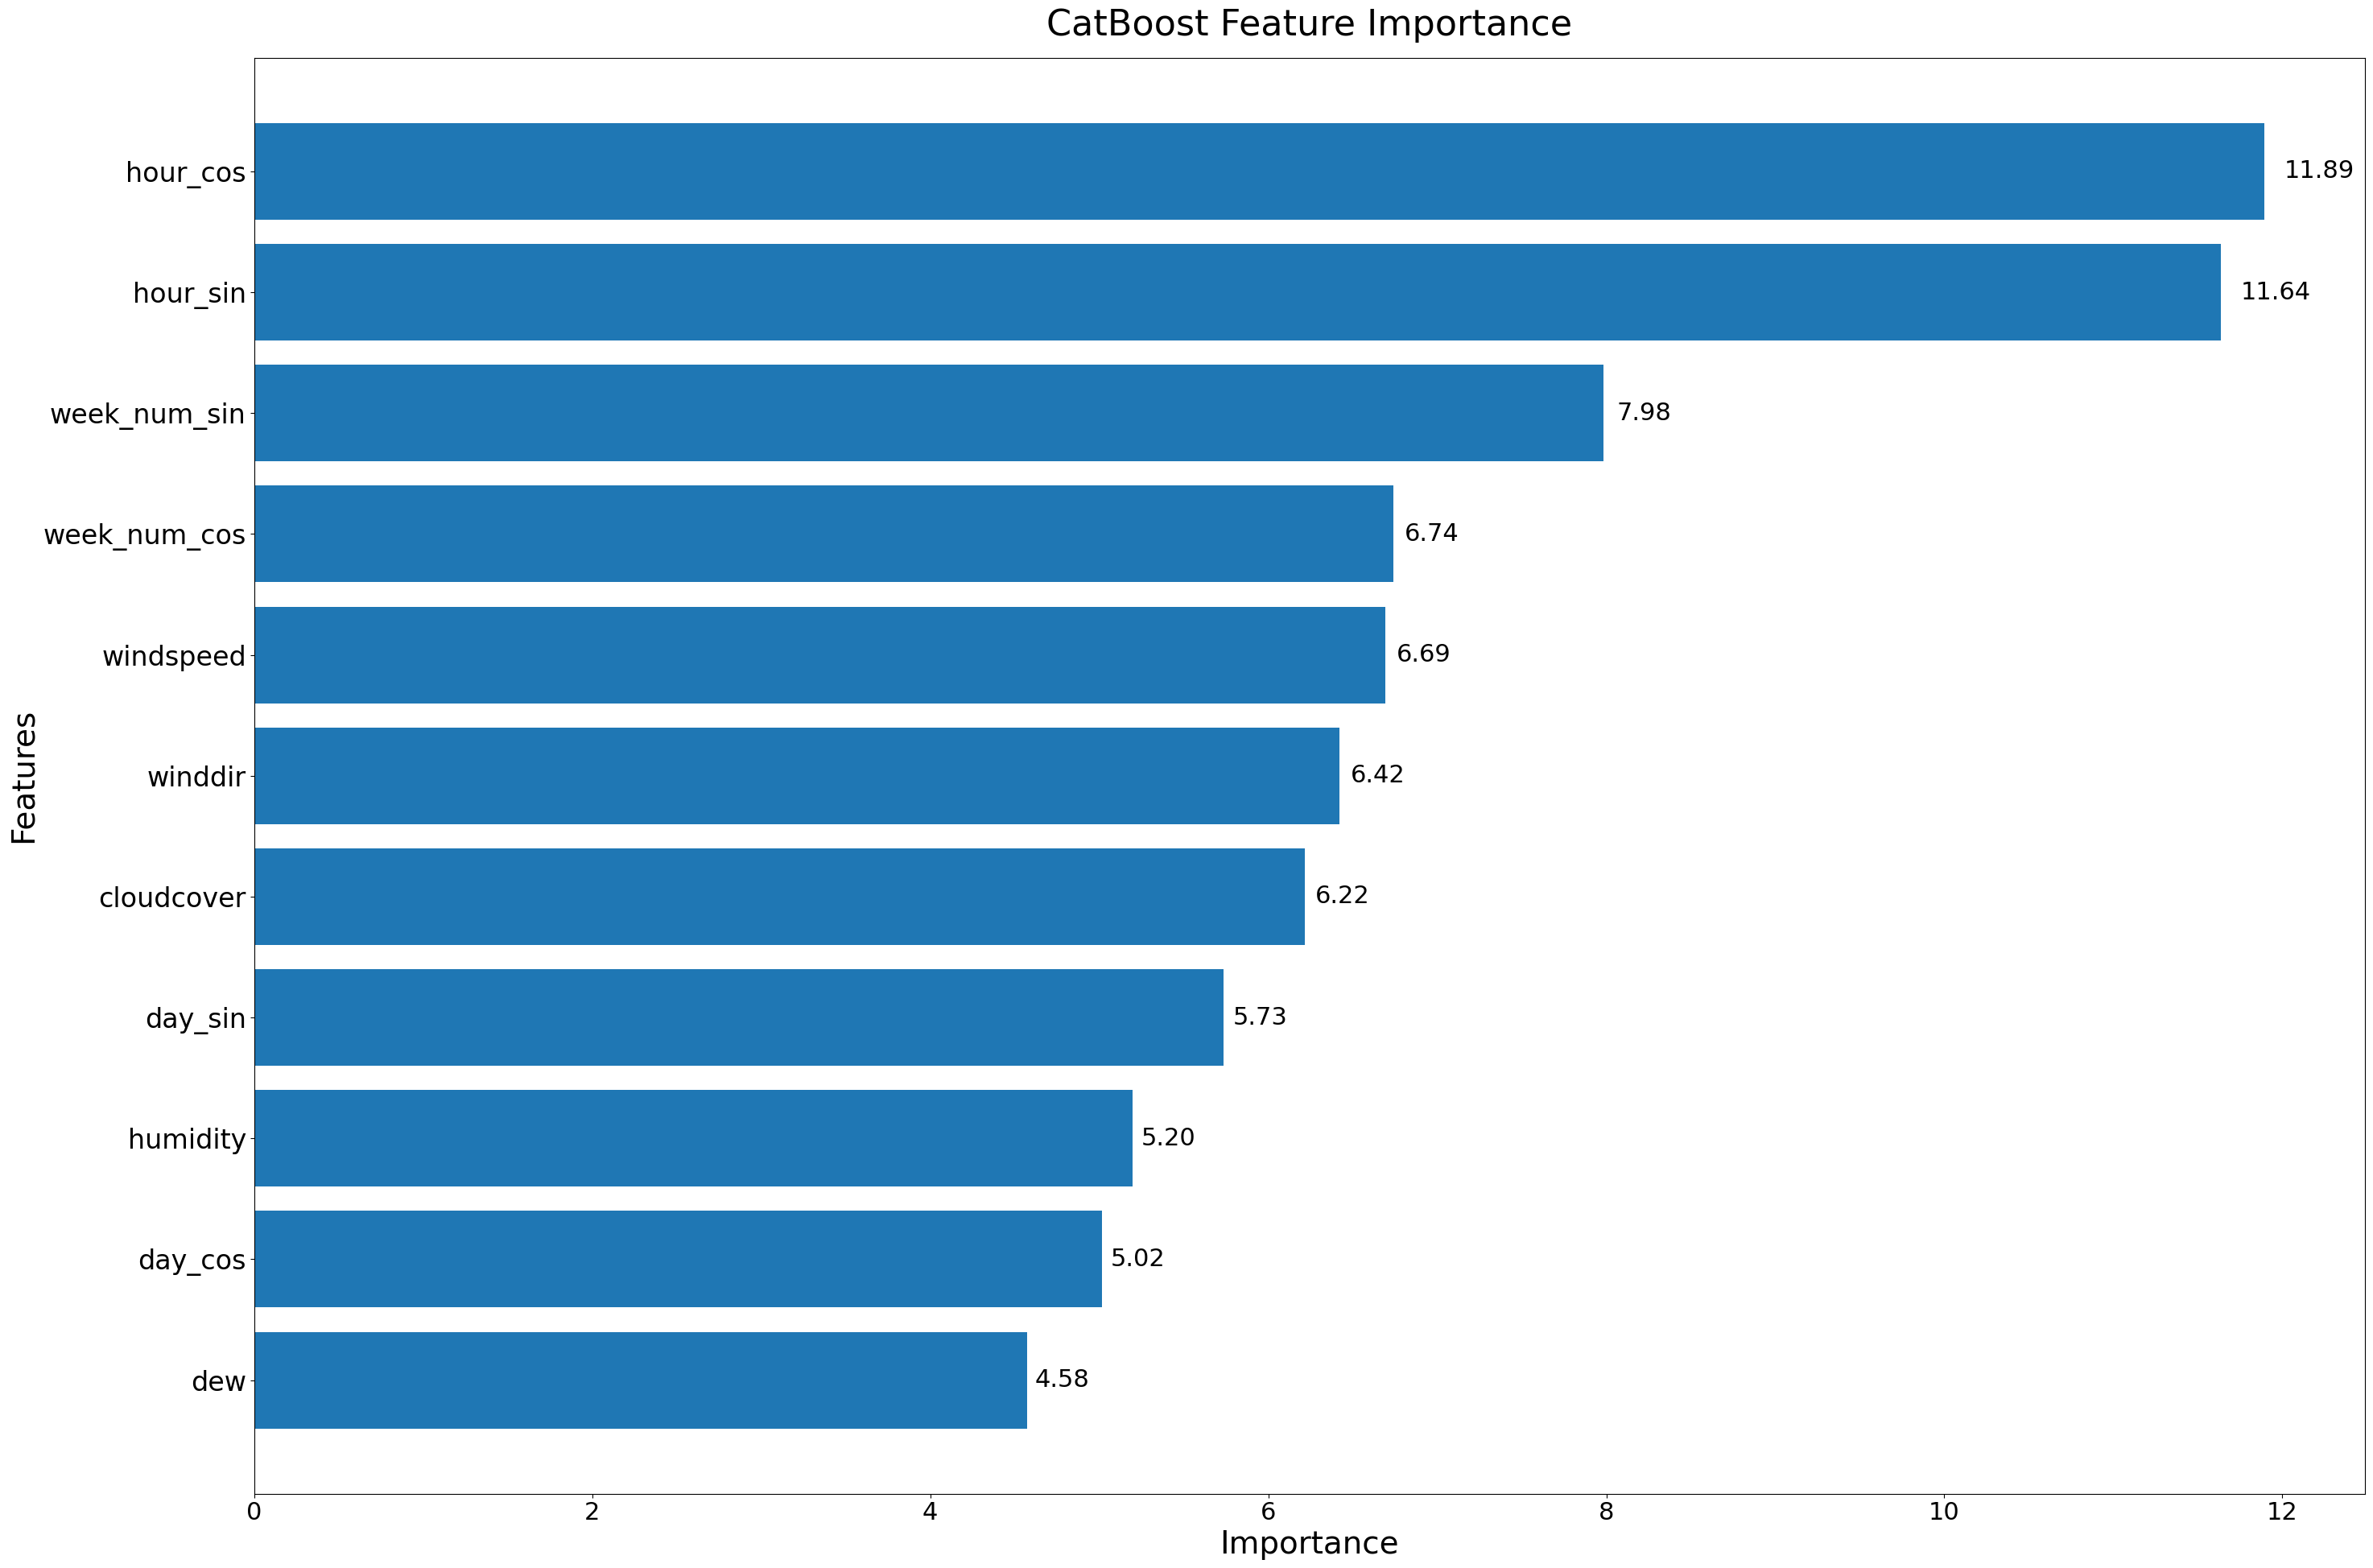

In [118]:
from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt

feature_importances = model.get_feature_importance()
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(len(feature_importances))]

importance_df = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Print feature importances
print("Feature Importance:")
importance_df = importance_df[0:11]  # Top 10 features
for feature, importance in importance_df:
    print(f"{feature}: {importance:.10f}")

plt.figure(figsize=(30, 20))

# Create the plot
bars = plt.barh([f[0] for f in importance_df[::-1]], [f[1] for f in importance_df[::-1]])

# Adjust font sizes
plt.rcParams.update({'font.size': 24})
plt.xlabel('Importance', fontsize=28)
plt.ylabel('Features', fontsize=28)
plt.title('CatBoost Feature Importance', fontsize=32, pad=20)

# Adjust tick label sizes
plt.xticks(fontsize=22)
plt.yticks(fontsize=24)

# Optional: Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width * 1.01, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}',
             ha='left', va='center', fontsize=22)

plt.tight_layout()
plt.show()

In [121]:
# save model and Meta Data
import joblib

package = {
    "model": model,
    "features": all_features,
    "targets": targets
}

joblib.dump(package, "catboost_No_lag_features_model_with_metadata.pkl")


['catboost_No_lag_features_model_with_metadata.pkl']

In [120]:
# to load model
loaded = joblib.load("catboost_No_lag_features_model_with_metadata.pkl")
model = loaded["model"]
features = loaded["features"]
targets = loaded["targets"]


In [21]:
import pandas as pd
import numpy as np

y_pred = model.predict(X_test)
# Convert to NumPy arrays if not already
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Create residuals for both targets
residuals_speed = y_test[:, 0] - y_pred[:, 0]
residuals_travel_time = y_test[:, 1] - y_pred[:, 1]

# Create a DataFrame for error analysis
error_df = pd.DataFrame({
    'Actual_Speed': y_test[:, 0],
    'Predicted_Speed': y_pred[:, 0],
    'Residual_Speed': residuals_speed,
    'Actual_TravelTime': y_test[:, 1],
    'Predicted_TravelTime': y_pred[:, 1],
    'Residual_TravelTime': residuals_travel_time,
})

#check Residual vs Actual

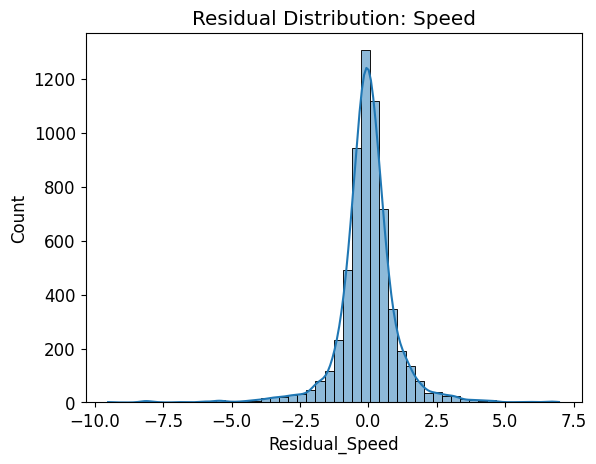

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Speed residuals
plt.rcParams.update({'font.size': 12})

sns.histplot(error_df['Residual_Speed'], bins=50, kde=True)
plt.title('Residual Distribution: Speed')
plt.show()


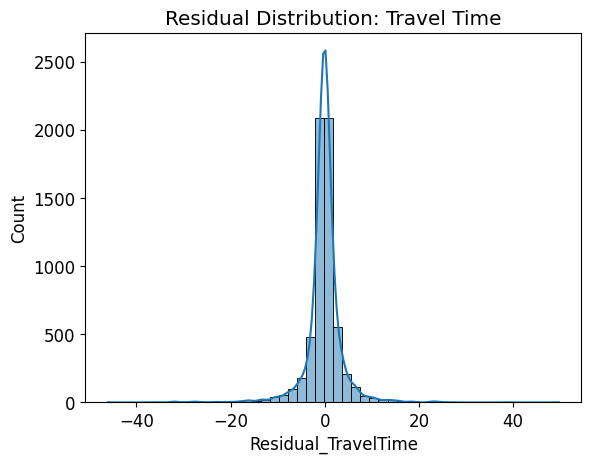

In [27]:
# Travel Time residuals

sns.histplot(error_df['Residual_TravelTime'], bins=50, kde=True)
plt.title('Residual Distribution: Travel Time')
plt.show()

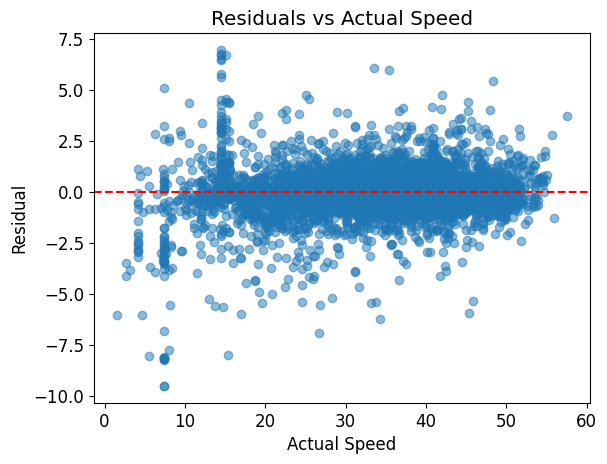

In [30]:
# Speed
plt.scatter(error_df['Actual_Speed'], error_df['Residual_Speed'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Speed')
plt.ylabel('Residual')
plt.title('Residuals vs Actual Speed')
plt.show()


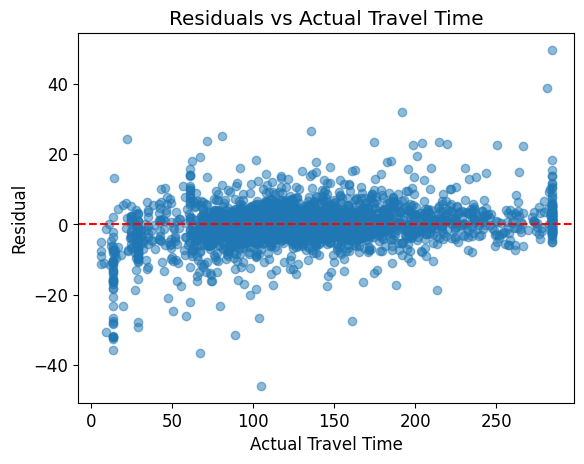

In [31]:
# Travel Time
plt.scatter(error_df['Actual_TravelTime'], error_df['Residual_TravelTime'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Travel Time')
plt.ylabel('Residual')
plt.title('Residuals vs Actual Travel Time')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
targets = ['speed', 'travel_time']

all_features = [
  'hour_sin','hour_cos', 'minute_sin', 'minute_cos', 'day_sin', 'day_cos',
  'week_num_sin', 'week_num_cos', 'month_sin', 'month_cos', 'is_holiday',
  'is_non_business_day', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
  'snow', 'snowdepth', 'windspeed', 'winddir', 'cloudcover', 'visibility',
  'solarradiation', 'solarenergy', 'uvindex','crash_count',
  'total_injuries', 'total_fatalities', 'crash_severity','crash_occurred'
]

X = cleaned[all_features]
y = cleaned[targets]

# Split features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2733
[LightGBM] [Info] Number of data points in the train set: 23464, number of used features: 28
[LightGBM] [Info] Start training from score 0.600146
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2733
[LightGBM] [Info] Number of data points in the train set: 23464, number of used features: 28
[LightGBM] [Info] Start training from score 0.417730


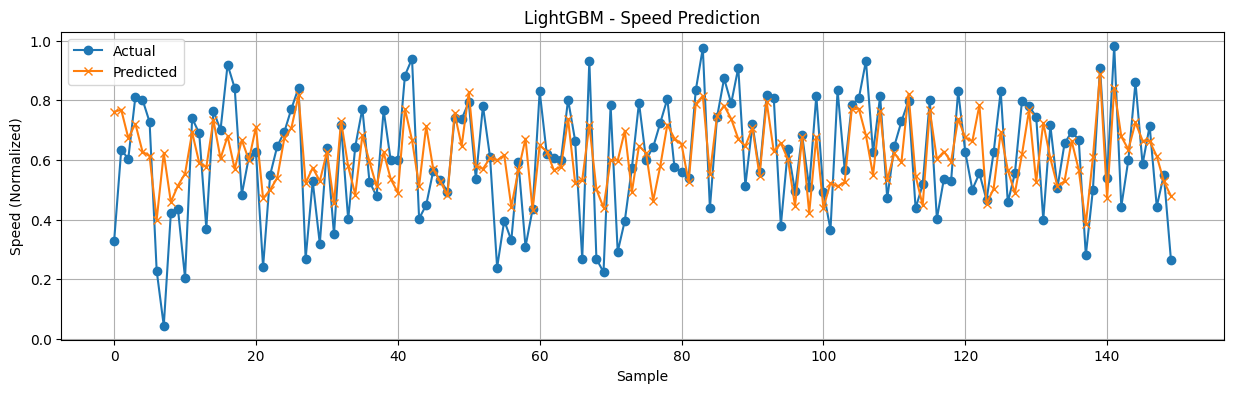


Training RandomForest...


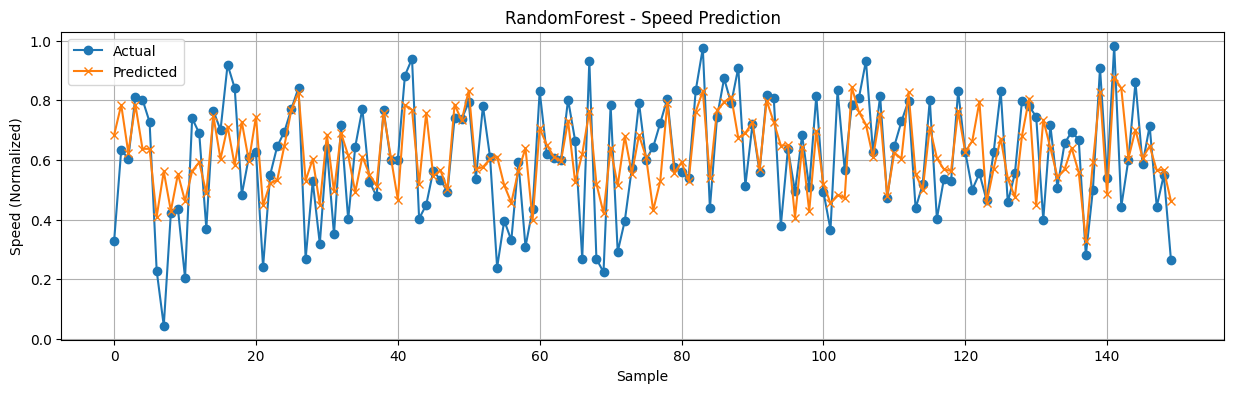


Training XGBoost...


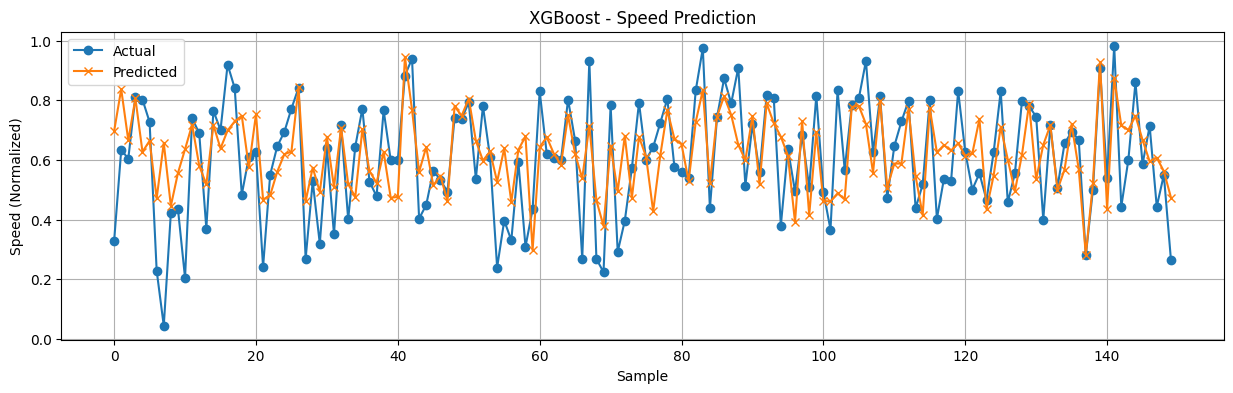


 Model Evaluation Summary:
          Model    RMSE     MSE     MAE  MedianAE      R2  ExplainedVariance  \
0      LightGBM  0.1402  0.0196  0.1067    0.0833  0.4558             0.4558   
1  RandomForest  0.1380  0.0190  0.1036    0.0796  0.4723             0.4724   
2       XGBoost  0.1366  0.0187  0.1031    0.0801  0.4831             0.4831   

   ResponseTimeSec  
0           0.0908  
1           0.4704  
2           0.0463  


In [16]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error,
    r2_score, explained_variance_score
)
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

models = {
    'LightGBM': MultiOutputRegressor(LGBMRegressor(random_state=42)),
    'RandomForest': MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42)),
    'XGBoost': MultiOutputRegressor(XGBRegressor(n_estimators=100, random_state=42, verbosity=0))
}

results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    # Inference
    start = time.time()
    preds = model.predict(X_test)
    end = time.time()
    response_time = end - start

    # Speed predictions
    preds_speed = preds[:, 0]
    y_test_speed = y_test['speed'].values

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test_speed, preds_speed))
    mse = mean_squared_error(y_test_speed, preds_speed)
    mae = mean_absolute_error(y_test_speed, preds_speed)
    medae = median_absolute_error(y_test_speed, preds_speed)
    r2 = r2_score(y_test_speed, preds_speed)
    explained_var = explained_variance_score(y_test_speed, preds_speed)

    results.append({
        'Model': name,
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae,
        'MedianAE': medae,
        'R2': r2,
        'ExplainedVariance': explained_var,
        'ResponseTimeSec': response_time
    })

    # Visualization
    plt.figure(figsize=(15, 4))
    plt.plot(y_test_speed[:150], label='Actual', marker='o')
    plt.plot(preds_speed[:150], label='Predicted', marker='x')
    plt.title(f"{name} - Speed Prediction")
    plt.xlabel("Sample")
    plt.ylabel("Speed (Normalized)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Display metrics
import pandas as pd

metrics_df = pd.DataFrame(results)
print("\n Model Evaluation Summary:")
print(metrics_df.round(4))
